<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/09_Enumeraci%C3%B3n_Reacciones_Qu%C3%ADmicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enumeración de bibliotecas químicas**
---
 Realizó: Fernanda Saldivar  Contacto: fer.saldivarg@gmail.com

# Objetivos:

---
* Ejemplificar el uso de la paquetería `SmilesDrawer` para la representación de reacciones químicas.
* Adquirir competencias en el empleo de SMARTS y SMIRKS para codificar reacciones químicas.
* Ilustrar la enumeración de bibliotecas químicas virtuales mediante un enfoque basado en reacciones químicas.



#Introducción:

---

Dentro de los enfoques basados en reglas para el diseño de bibliotecas químicas, el diseño basado en esquemas de síntesis y reactivos disponibles han demostrado la importancia del conocimiento de reacciones inteligentes en el campo de la exploración del espacio químico. Integrar este conocimiento ha permitido diseñar bibliotecas sintéticamente accesibles, como BI-CLAIM  desarrollada por Boehringer Ingelheim (Lessel et al, 2009) y CHIPMUNK (Humbeck et al., 2018). Otro ejemplo es la biblioteca TIN, una base de datos de química combinatoria construida alrededor de la viabilidad sintética de reacciones multicomponente que contiene más de 28 millones de estructuras de productos que son novedosos y sintéticamente accesibles (Dorschner et al., 2011). De manera similar, y tomando en cuenta las reacciones de química click de los triazoles, se generó la base de datos ZINClick que está compuesta por más de 16 millones de 1,2,3- y 1,4-triazoles disustituidos, cuyas estructuras son novedosas y sintéticamente factibles (Massarotti et al., 2014). Otra biblioteca virtual de acceso libre es 'Screenable Chemical Universe Based on Intuitive Data OrganizatiOn' (SCUBIDOO) (Chevillard & Kolb, 2015). En SCUBIDOO, se aplicaron 58 reacciones sólidas a 18 561 bloques de construcción moleculares comunes para generar más de 21 millones de compuestos. Otra biblioteca virtual es la base de datos REAL, descrita en la plataforma VirtualFlow que contiene más de 1.400 millones de compuestos de fabricación bajo demanda.

Aunque cada biblioteca tiene sus variaciones, se pueden distinguir pasos en común que consisten en:
1. Seleccionar un enfoque de síntesis a seguir  y las reacciones a emplear (p. ej. síntesis orientada en biología (BIOS, del inglés biology-oriented synthesis), síntesis orientada en diversidad (DOS, del inglés diversity oriented synthesis), química combinatoria o síntesis tradicional).
2. Construir o identificar los bloques de construcción a emplear (generalmente bloques disponibles comercialmente).
3. Identificar las características de los bloques de construcción para la estrategia a seguir. En este paso se pueden filtrar los fragmentos de acuerdo a grupos funcionales o por precio.
4. Establecer las reacciones a utilizar en un formato legible para la computadora (por ejemplo, SMIRKS).
5. Uso de herramientas de quimioinformática para la automatización del enfoque de síntesis (p. ej. KNIME, RDKit o DataWarrior).
6. Implementación de filtros para la exclusión y remoción de compuestos duplicados o compuestos con alertas estructurales.

A continuación describiremos ejemplos para representar reacciones químicas y enumerar una biblioteca química usando un enfoque basado en reacciones químicas.

#Ejercicios:
---

### Representación de reacciones usando SMILES

1. Instalar el faerun. Ver documentación

In [ ]:
!pip install faerun-notebook==0.1.5b0

2. Importar las siguientes funciones:

In [ ]:
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

3. Con la herramienta SmilesDrawer, colocar en las primeras comillas el título, en las segundas los dos reactivos separados por un punto y finalmente, separado entre ">>" está el producto de la reacción.
Adicionalmente se colocó un tema, fondo y tamaño de la representación.

Nota: SmilesDrawer es un componente capaz de analizar y dibujar estructuras moleculares codificadas con SMILES. Puede dibujar estructuras con estereoquímicas complejas sin usar plantilla y aún así tiene una huella computacional muy baja. Además tiene bajo uso de memoria sin necesidad de cargar imágenes. Estas caracteristicas permiten la representación de miles de dibujos de estructuras moleculares en una sóla página web

In [ ]:
SmilesDrawer(value=[
    ("Condensación aldolica", "C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Condensación aldolica', 'C1…

Para unir los dos elementos descritos, únicamente se colocan en el corchete separados por comas y dentro de un paréntesis

In [ ]:
SmilesDrawer(value=[
    ("Condensación aldolica", "C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2"),
    ("Ácido tereftálico", "C1=CC(=CC=C1C(=O)O)C(=O)O"),
    ("Una molécula", "CNCNCCN")
], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Condensación aldolica', 'C1…

Además del tema, se pueden cambiar distintos elementos gráficos como el grosor de las lineas

In [ ]:
SmilesDrawer(value="C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2", theme='matrix', background="#000000", options={'scale': 1.5, 'bondThickness': 2.5})

SmilesDrawer(background='#000000', options={'scale': 1.5, 'bondThickness': 2.5}, theme='matrix', value='C1=CC=…

### Enumeración de bibliotecas mediante el uso de reacciones químicas

Diseño de una bibioteca de compuestos bis-heterociclos obtenidos mediante química click utilizando la paquetería `RDKit`.

1. **Selección del enfoque de síntesis.**
Este ejemplo se basa en el enfoque de síntesis reportado por Shafi et al. para obtener compuestos bis -heterociclos, vinculando bloques de construcción de heterociclos de 5 miembros que contienen uno o dos heteroátomos (al menos un nitrógeno, azufre, oxígeno) a un conjunto de bloques de construcción que contienen azida a través de la formación de un disustituido en 1,4 ,2,3-triazol mediante química click (Shafi et al., 2012).

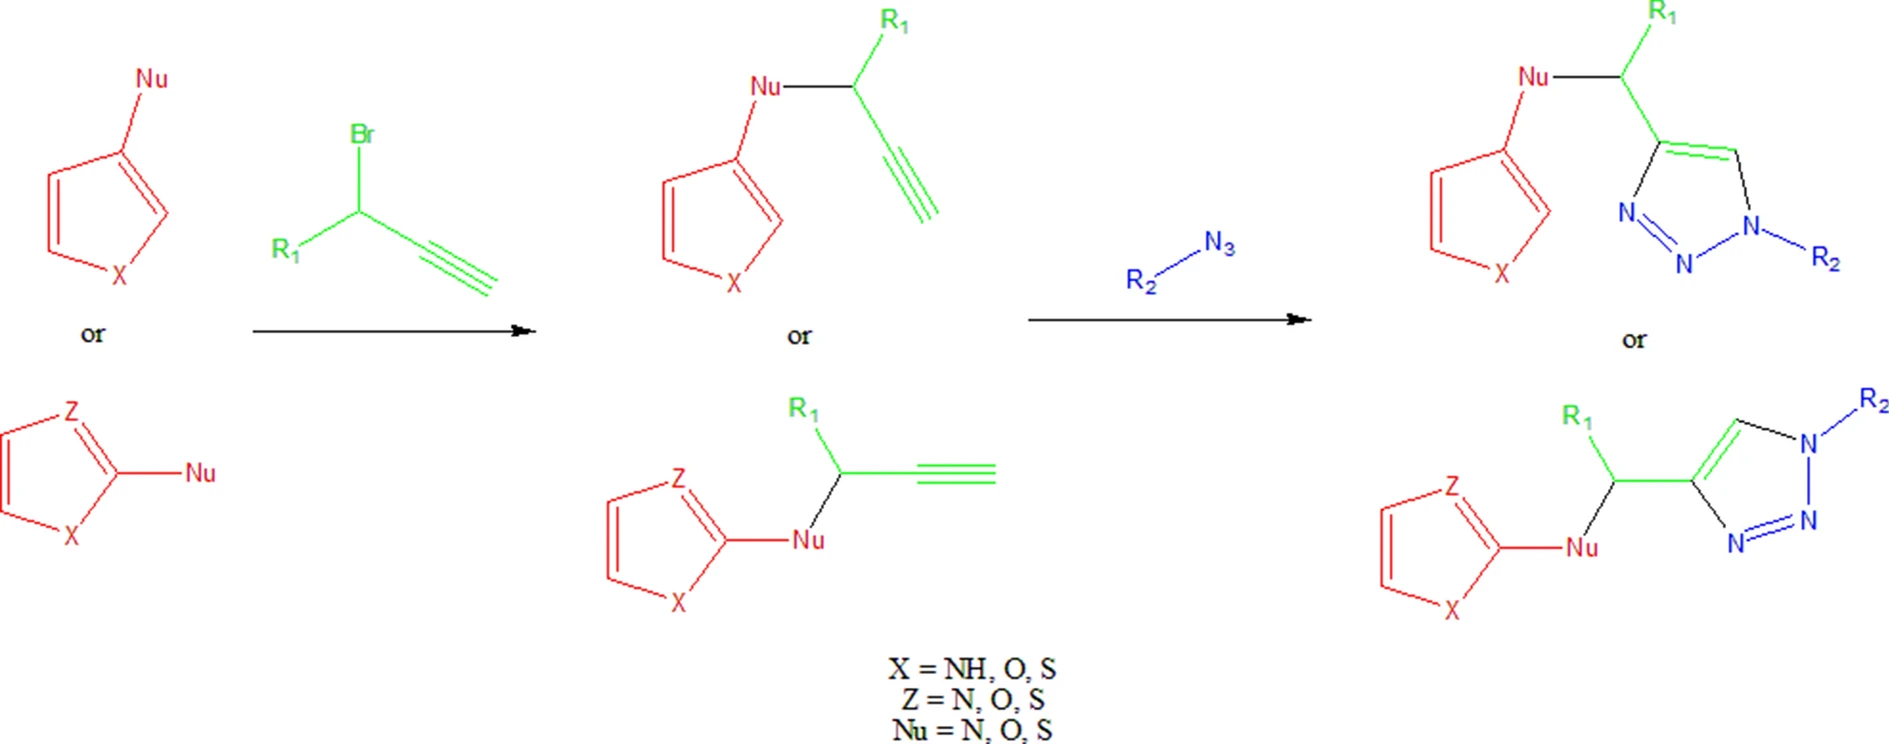

2. **Construcción o identificación de bloques de construcción.** Los bloques de construcción utilizados para este ejemplo se tomaron del catálogo de Sigma Aldrich (*Building Blocks*) presente en ZINC DB. Este catálogo consta de 124 368 bloques de construcción.
Se eliminaron los compuestos duplicados y se seleccionaron los bloques de construcción que cumplen con la 'regla de tres' de Congreve (Crongreve et al., 2003). La base de datos seleccionada se puede encontrar como "Sigma_bb.sdf".

NOTA: Para consultar otros catálogos de bloques de construcción disponibles comercialmente en ZINC puede acceder al siguiente enlace: https://zinc.docking.org/catalogs/

3. **Identificar las características de los bloques de construcción para la estrategia a seguir.**
Se construyeron los SMARTS para detectar la presencia de grupos funcionales apropiados para llevar a cabo el enfoque descrito en el punto 1.

A continuación se describen las características para la construcción de cada SMARTS. Recuerde que para visualizar y editar los SMARTS utilizando  MarvinSketch o SMARTSPlus.

* Anillo heterocíclico de 5 miembros con uno (N, O o S) o dos heteroátomos (N, O, S; al menos un N) y un sustituyente nucleofílico (- OH, –SH, –NH2 ).  

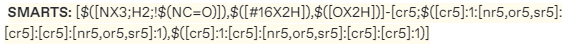

* Alquino terminal 3-bromo o cloro sustituido.

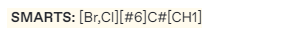
* Azida.

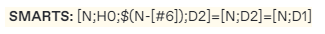

4. **Establecer las reacciones de emparejamiento en un formato legible SMIRKS.**


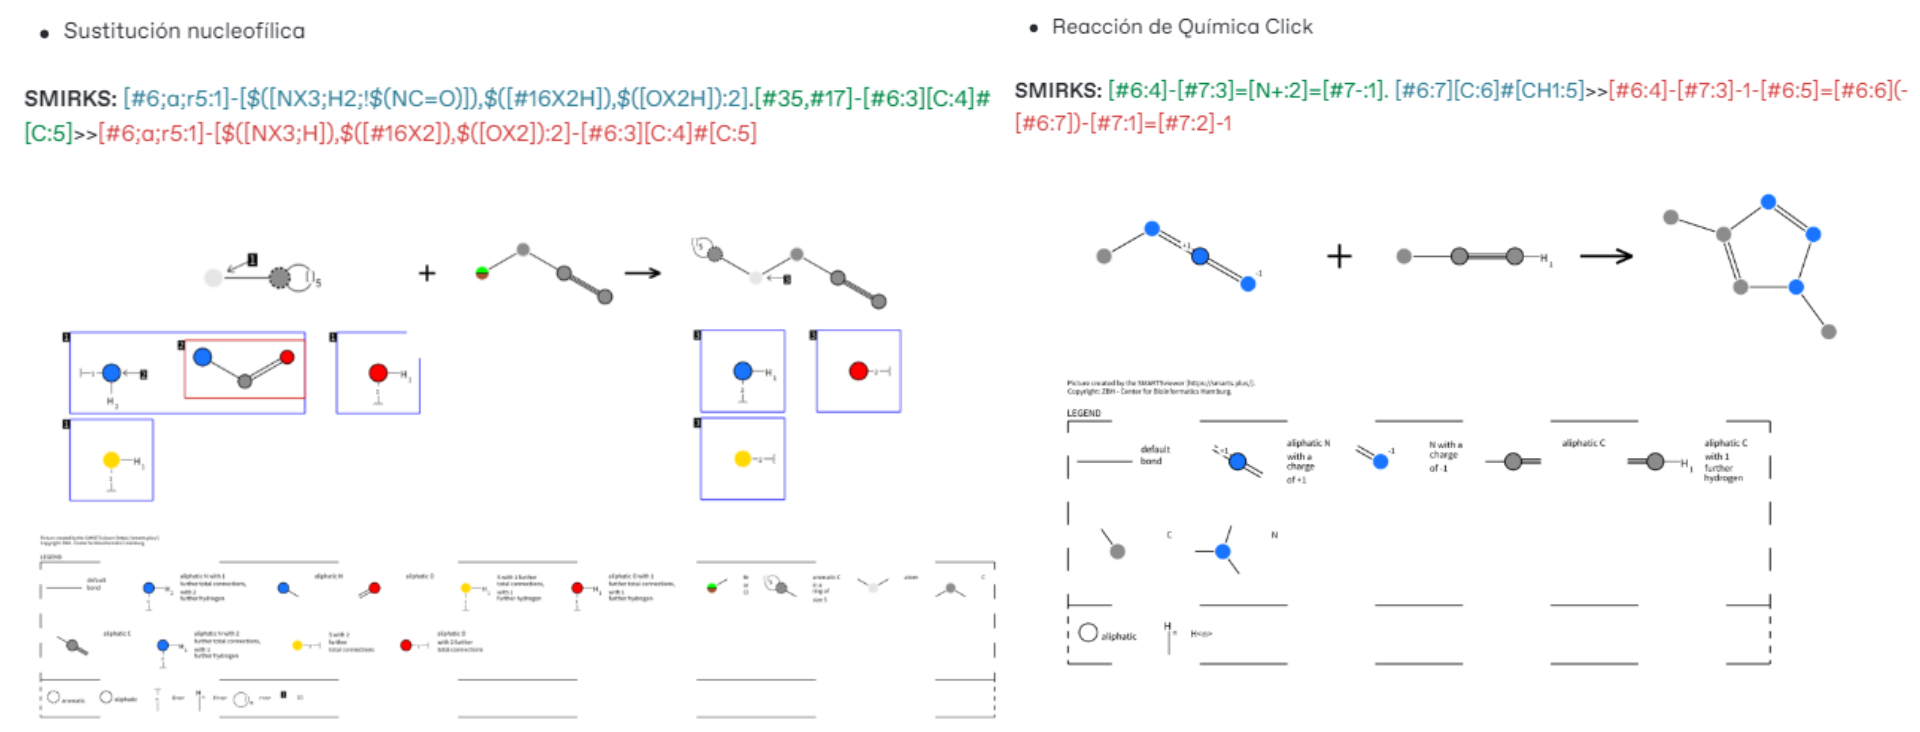

5. **Uso de herramientas de quimioinformática para la automatización del enfoque de síntesis.**
En este ejemplo utilizaremos la paquetería `RDKit` para generar la biblioteca de compuestos bis-heterociclos.  Ejemplos para la construcción  de bibliotecas químicas utilizando otras herramientas quimioinformáticas como KNIME y DataWarrior pueden consultarse en [Saldivar-González et al. 2020](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00466-z).

a) Instale paqueterías y módulos a ocupar.

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 67.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import rdkit as rk
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import CalcNumHeteroatoms
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors

b) Leer la biblioteca de bloques de construcción de Sigma usando la función `Supplier` de RDKit.

In [ ]:
supp = Chem.SDMolSupplier('/content/Sigma_bb.sdf')
for mol in supp:
    if mol is not None: mol.GetNumAtoms()

[19:15:19] atom 2 has specified valence (2) smaller than the drawn valence 3.


c) Crear una lista que contenga los bloques de construcción de Sigma.

In [ ]:
mols = [x for x in supp]
len(mols) #Number of building blocks


[19:15:23] atom 2 has specified valence (2) smaller than the drawn valence 3.


28355

d) Filtrar bloques de construcción de acuerdo a los SMARTS establecidos en el punto 3.

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


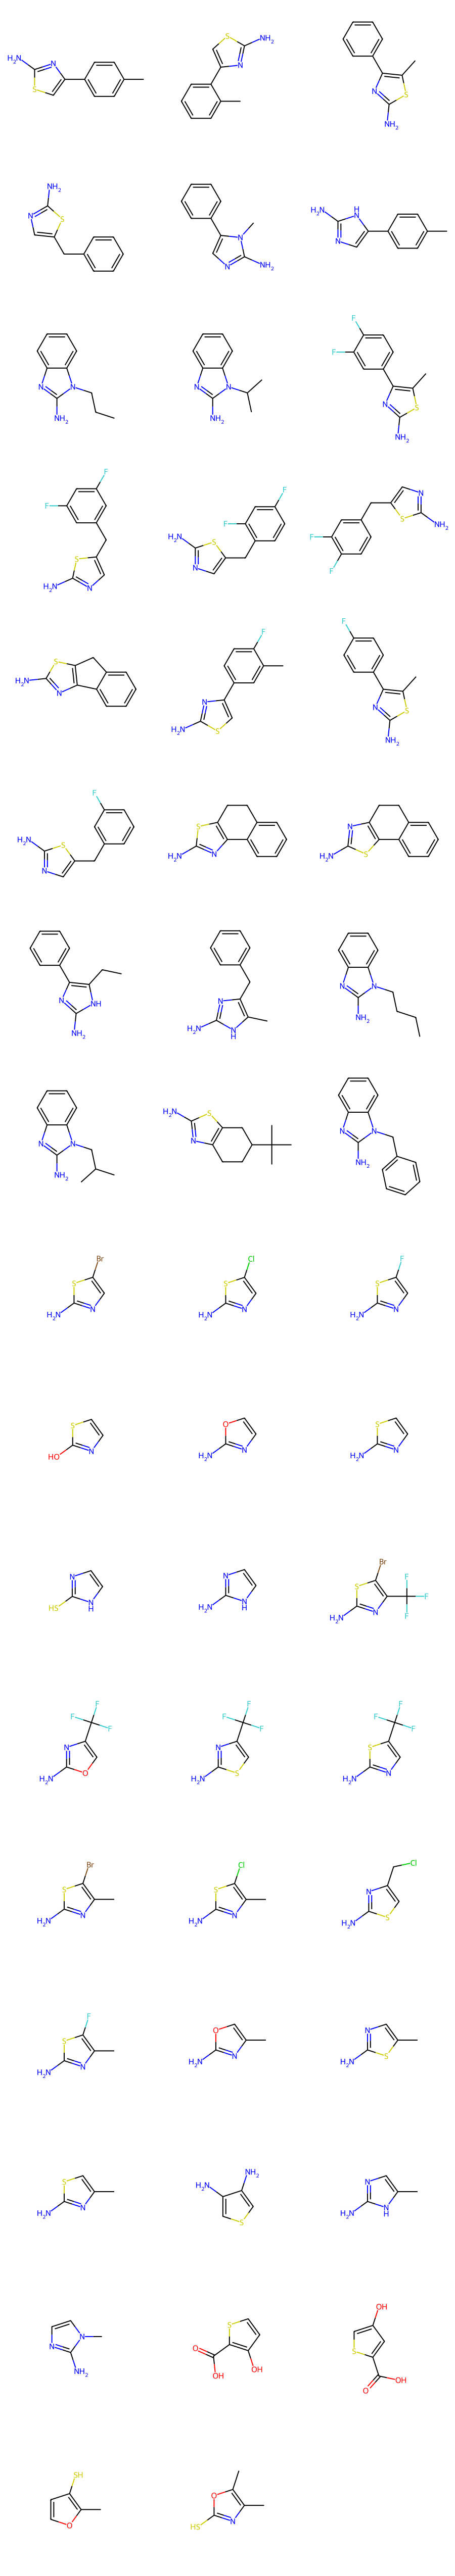

In [ ]:
#SMARTS Anillo heterocíclico de 5 miembros
patt1= Chem.MolFromSmarts('[$([NX3;H2;!$(NC=O)]),$([#16X2H]),$([OX2H])]-[cr5;$([cr5]:1:[nr5,or5,sr5]:[cr5]:[cr5]:[nr5,or5,sr5]:1),$([cr5]:1:[cr5]:[nr5,or5,sr5]:[cr5]:[cr5]:1)]')
het5 = [x for x in mols if x.HasSubstructMatch(patt1)]
from rdkit.Chem import Draw
Draw.MolsToGridImage(list(het5), subImgSize=(300,300))

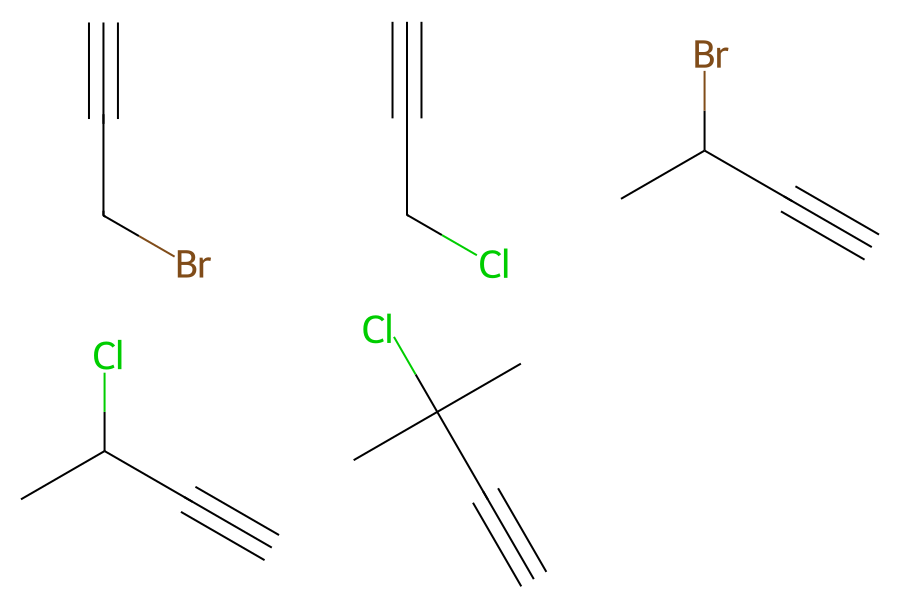

In [ ]:
##SMARTS Alquino terminal 3-bromo o cloro sustituido.
patt2= Chem.MolFromSmarts('[Br,Cl][#6]C#[CH1]')
alkynes = [x for x in mols if x.HasSubstructMatch(patt2)]
Draw.MolsToGridImage(list(alkynes), subImgSize=(300,300))

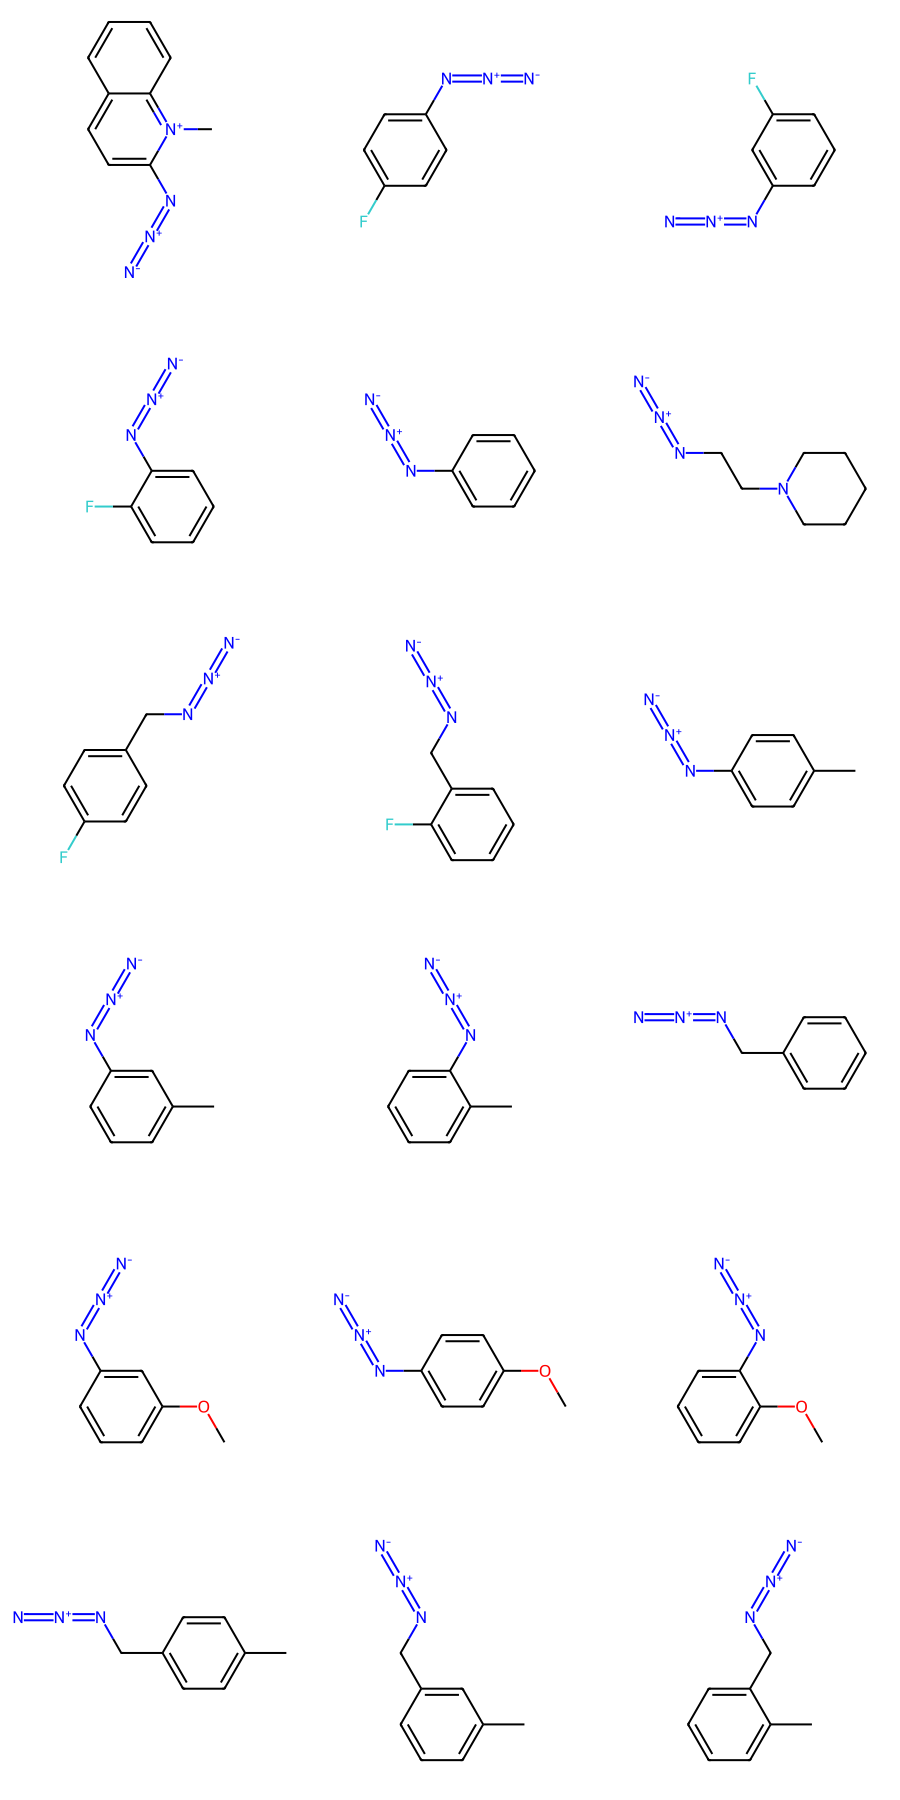

In [ ]:
#SMARTS Azida
patt3= Chem.MolFromSmarts('[N;H0;$(N-[#6]);D2]=[N;D2]=[N;D1]')
azide = [x for x in mols if x.HasSubstructMatch(patt3)]
Draw.MolsToGridImage(list(azide), subImgSize=(300,300))

e) Establecer las reacciones de acoplamiento y llevar a cabo las enumeración de los compuestos.

In [ ]:
#Sustitución nucleofílica
rxn=AllChem.ReactionFromSmarts('[#6;a;r5:1]-[$([NX3;H2;!$(NC=O)]),$([#16X2H]),$([OX2H]):2].[#35,#17]-[#6:3][C:4]#[C:5]>>[#6;a;r5:1]-[$([NX3;H]),$([#16X2]),$([OX2]):2]-[#6:3][C:4]#[C:5]')

prods1 = AllChem.EnumerateLibraryFromReaction(rxn,[het5,alkynes])
smis = list(set([Chem.MolToSmiles(x[0],isomericSmiles=True) for x in prods1]))

#Reacción de química click

rxn2= AllChem.ReactionFromSmarts('[#6:7][C:6]#[CH1:5].[#6:4]-[#7:3]=[N+]=[#7-]>>[#6:4]-[#7:3]-1-[#6:5]=[#6:6](-[#6:7])-[#7]=[#7]-1 |c:10,t:7|')
prods2 = AllChem.EnumerateLibraryFromReaction(rxn2,[[ Chem.MolFromSmiles(x) for x in smis ],azide])
smis2 = list(set([Chem.MolToSmiles(x[0],isomericSmiles=True) for x in prods2]))
len(smis2)

7884

In [ ]:
smis2

['Fc1cccc(Cc2cnc(NCC3=CN(Cc4ccccc4F)N=N3)s2)c1',
 'Cc1ccccc1N1C=C(C(C)Sc2nc(C)c(C)o2)N=N1',
 'C[n+]1c(N2C=C(CNc3nc(C4CC4)cs3)N=N2)ccc2ccccc21',
 'CC(C)c1cnc(NCC2=CN(Cc3ccc(F)cc3)N=N2)s1',
 'CC(C)(Nc1ncc[nH]1)C1=CN(CCN2CCCCC2)N=N1',
 'Cc1ccc(-c2cnc(NC(C)C3=CN(c4ccccc4C)N=N3)[nH]2)cc1',
 'Cc1ccc(CN2C=C(CNc3nc4c(s3)-c3ccccc3CC4)N=N2)cc1',
 'CC(Nc1nc2ccccc2n1C)C1=CN(c2ccccc2)N=N1',
 'Cc1cccc(CN2C=C(CNc3nc4ccc(F)cc4s3)N=N2)c1',
 'Fc1ccc(CN2C=C(CNc3nc4ccccc4s3)N=N2)cc1',
 'Cc1cccc(N2C=C(C(C)Nc3nc(-c4ccc(F)c(F)c4)cs3)N=N2)c1',
 'COc1ccc2[nH]c(SCC3=CN(c4ccc5ccccc5[n+]4C)N=N3)nc2c1',
 'CC(C)(Nc1ncc(-c2ccc(Br)cc2)[nH]1)C1=CN(CCN2CCCCC2)N=N1',
 'CC(Nc1nc2ccccc2[nH]1)C1=CN(c2ccccc2)N=N1',
 'Cc1ccc(N2C=C(C(C)Nc3ncc(C(C)C)s3)N=N2)cc1',
 'Cc1ccc(N2C=C(CNc3ncc(C(C)C)s3)N=N2)cc1',
 'CC(C)(Nc1nc2ccc(Cl)cc2s1)C1=CN(c2ccccc2F)N=N1',
 'CC(C)(Nc1nc(C(F)(F)F)co1)C1=CN(Cc2ccccc2)N=N1',
 'CC(Nc1ncc(-c2cccc(Cl)c2)o1)C1=CN(CCN2CCCCC2)N=N1',
 'Fc1ccc(N2C=C(CSc3nc4cccc(F)c4s3)N=N2)cc1',
 'Cc1ccc(CN2C=C(C(C)Nc3nc(C

f) Exportar los resultados en un archivo con formato csv.

In [ ]:
#Export results as .CSV File
df = pd.DataFrame(smis2, columns=["colummn"])
df.to_csv('bis_heterocycles.csv', index=False)
df

,colummn
0,Fc1cccc(Cc2cnc(NCC3=CN(Cc4ccccc4F)N=N3)s2)c1
1,Cc1ccccc1N1C=C(C(C)Sc2nc(C)c(C)o2)N=N1
2,C[n+]1c(N2C=C(CNc3nc(C4CC4)cs3)N=N2)ccc2ccccc21
3,CC(C)c1cnc(NCC2=CN(Cc3ccc(F)cc3)N=N2)s1
4,CC(C)(Nc1ncc[nH]1)C1=CN(CCN2CCCCC2)N=N1
...,...
7879,Cn1c(SC(C)(C)C2=CN(Cc3ccc(F)cc3)N=N2)nc2ccccc21
7880,CC(Nc1ncc(Cc2ccc(F)c(F)c2)s1)C1=CN(c2ccc3ccccc...
7881,CC(C)(C)c1nc(NCC2=CN(c3ccccc3F)N=N2)sc1Br
7882,Cc1ccc(CN2C=C(C(C)(C)Nc3nc4c(s3)Cc3ccccc3-4)N=...


e) Visualizar los compuestos  generados.

['colummn', 'Molecule']


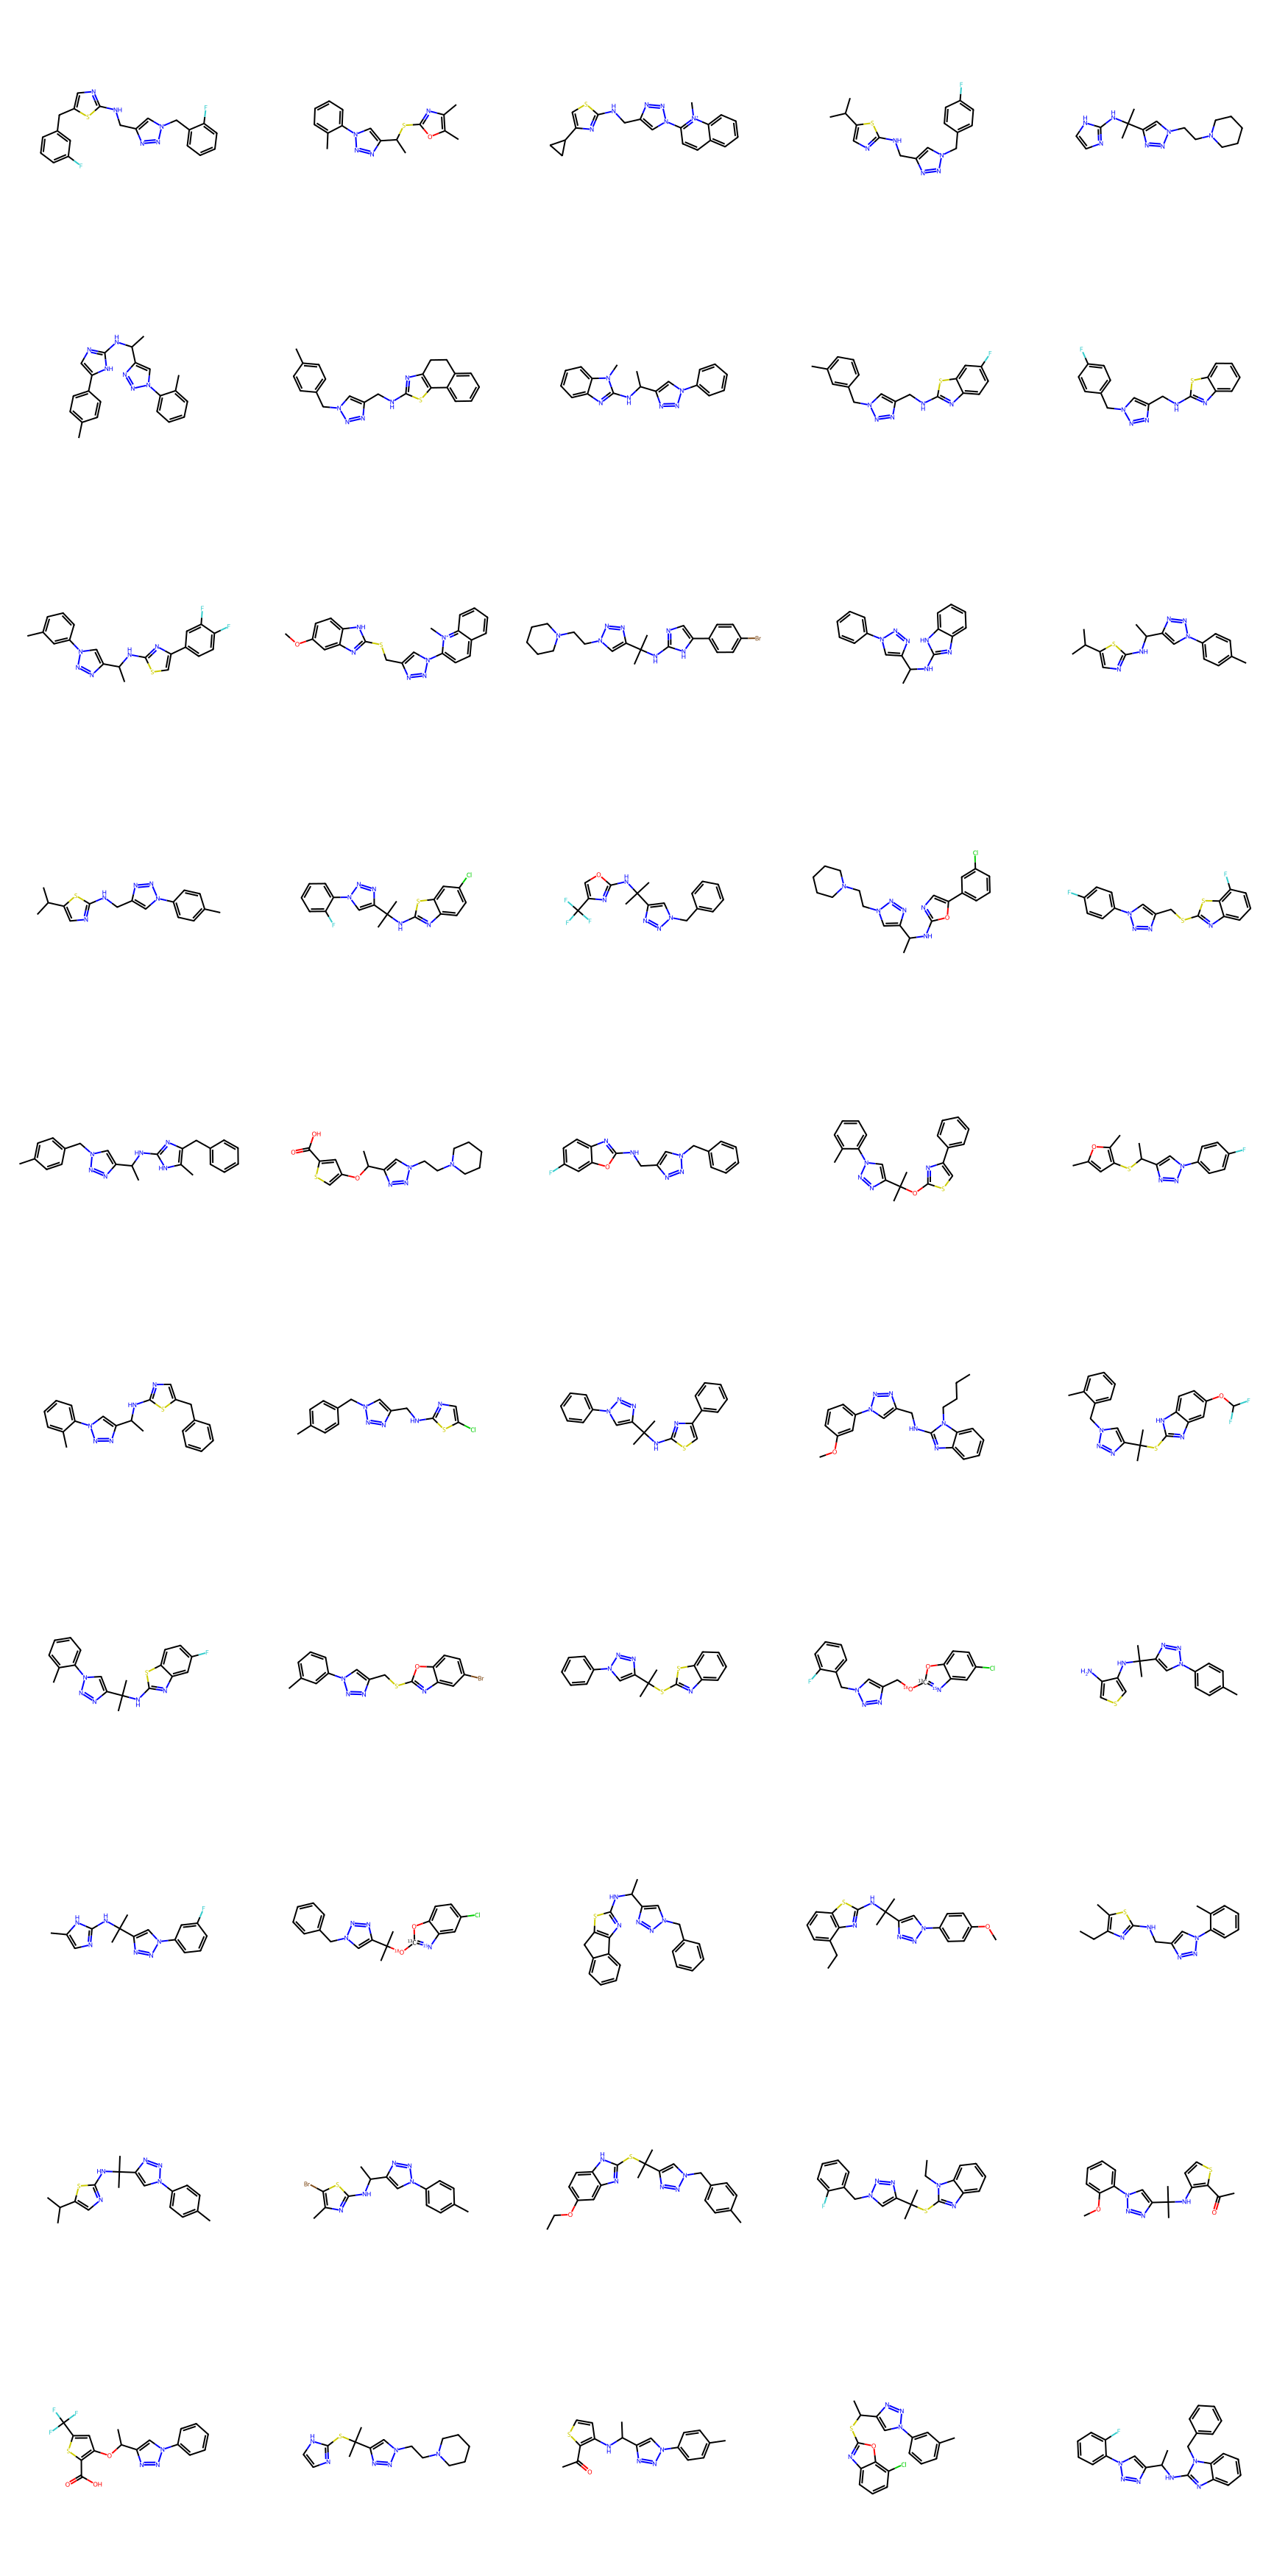

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df,'colummn','Molecule',includeFingerprints=True)
print([str(x) for x in  df.columns])

PandasTools.FrameToGridImage(df,column= 'Molecule', molsPerRow=5,subImgSize=(350,350))

# Para saber más:
* Chevillard F, Kolb P (2015) [SCUBIDOO: A Large yet Screenable and Easily Searchable Database of Computationally Created Chemical Compounds Optimized toward High Likelihood of Synthetic Tractability.](https://pubs.acs.org/doi/10.1021/acs.jcim.5b00203) *J Chem Inf Model*. 55:1824-35.
* Dorschner KV, Toomey D, Brennan MP, Heinemann T, Duffy FJ, Nolan KB, Cox D, Adamo MF, Chubb AJ (2011) [TIN-a combinatorial compound collection of synthetically feasible multicomponent synthesis products.](https://pubs.acs.org/doi/10.1021/ci100443x) *J Chem Inf Model*. 51:986-95.
* Humbeck L, Weigang S, Schäfer T, Mutzel P, Koch O (2018) [CHIPMUNK: A virtual synthesizable small-molecule library for medicinal chemistry, exploitable for protein-protein interaction modulators.](https://chemistry-europe.onlinelibrary.wiley.com/doi/10.1002/cmdc.201700689) *ChemMedChem*. 13:532–539.
* Lessel U, Wellenzohn B, Lilienthal M, Claussen H (2009) [Searching fragment spaces with feature trees.](https://pubs.acs.org/doi/10.1021/ci800272a) *J Chem Inf Model.* 49:270–279.
* Massarotti A, Brunco A, Sorba G, Tron GC (2014) [ZINClick: a database of 16 million novel, patentable, and readily synthesizable 1,4-disubstituted triazoles.](https://pubs.acs.org/doi/10.1021/ci400529h) *J Chem Inf Model.* 54:396-406. doi: 10.1021/ci400529h. Epub 2014 Jan 31. PMID: 24451008.
* Saldívar-González FI, Huerta-García CS. & Medina-Franco JL. (2020) [Chemoinformatics-based enumeration of chemical libraries: a tutorial.](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00466-z) *J Cheminform.* 12, 64.
* Shafi S, Alam MM, Mulakayala N, Mulakayala C, Vanaja G, Kalle AM et al (2012) [Synthesis of novel 2-mercapto benzothiazole and 1,2,3-triazole based bis-heterocycles: their anti-inflammatory and anti-nociceptive activities.](https://www.sciencedirect.com/science/article/abs/pii/S0223523412000475?via%3Dihub) *Eur J Med Chem.* 49:324–333.
* Schmidt, R.; Ehmki, E. S. R.; Ohm, F.; Ehrlich, H.-C.; Mashychev, A.; Rarey, M. (2019) [Comparing Molecular Patterns using the Example of SMARTS: Theory and Algorithms](https://pubs.acs.org/doi/10.1021/acs.jcim.9b00249). *J Chem Inf Model.* 59(6):2560-2571.